# Car Price Predictor
The objective of this model is to predict the price of the different cars based on the different features in the dataset 'cars_price.csv'. This is a regression data set. The target variable is the price of the car.

In [127]:
#Importing Data
import pandas as pd
data = pd.read_csv('cars_price.csv')
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [128]:
data.shape

(205, 26)

# Understanding the dataset

In [129]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [130]:
columns = data.columns
columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
[ 3  1  2  0 -1 -2]


<AxesSubplot:xlabel='symboling', ylabel='price'>

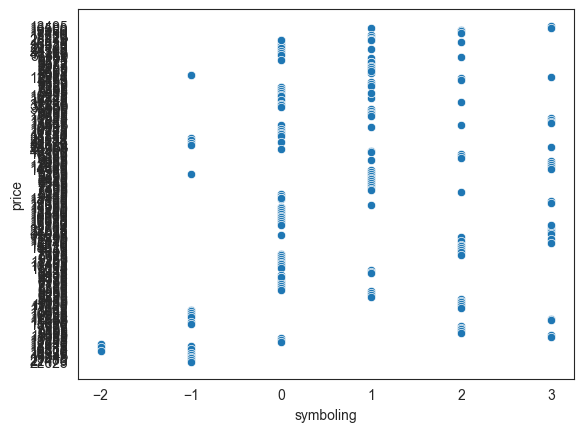

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
print(data['symboling'].value_counts())
print(data['symboling'].unique())
sns.scatterplot(data, x = data['symboling'], y = data['price'])

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']


<AxesSubplot:xlabel='normalized-losses', ylabel='price'>

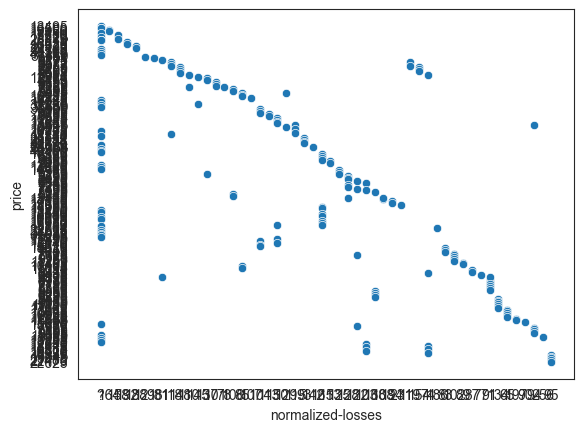

In [132]:
print(data['normalized-losses'].value_counts())
print(data['normalized-losses'].unique())
sns.scatterplot(data, x = data['normalized-losses'], y = data['price'])

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


<AxesSubplot:xlabel='make', ylabel='price'>

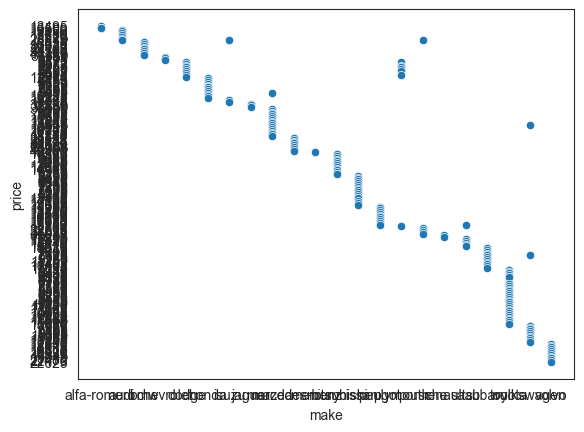

In [133]:
print(data['make'].value_counts())
print(data['make'].unique())
sns.scatterplot(data, x = data['make'], y = data['price'])

gas       185
diesel     20
Name: fuel-type, dtype: int64
['gas' 'diesel']


<AxesSubplot:xlabel='fuel-type', ylabel='price'>

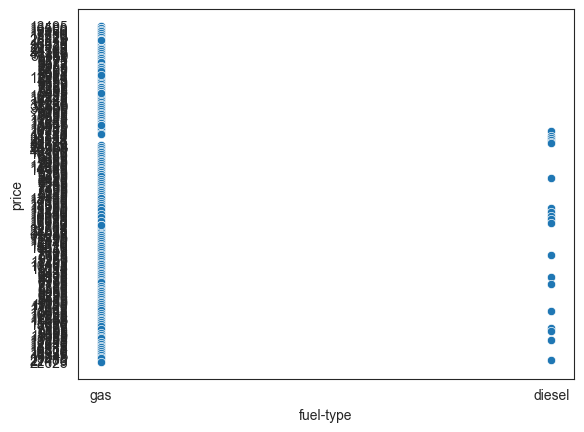

In [134]:
print(data['fuel-type'].value_counts())
print(data['fuel-type'].unique())
sns.scatterplot(data, x = data['fuel-type'], y = data['price'])

std      168
turbo     37
Name: aspiration, dtype: int64
['std' 'turbo']


<AxesSubplot:xlabel='aspiration', ylabel='price'>

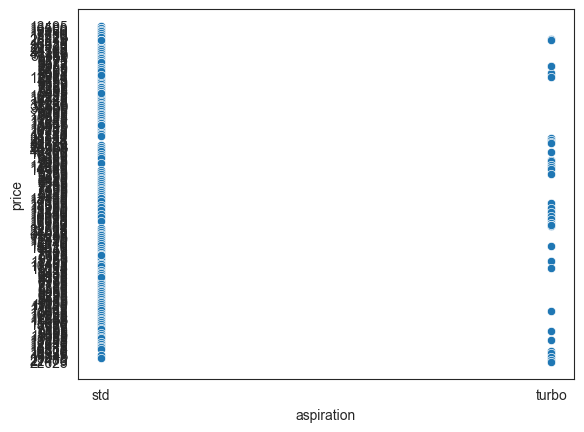

In [135]:
print(data['aspiration'].value_counts())
print(data['aspiration'].unique())
sns.scatterplot(data, x = data['aspiration'], y = data['price'])

four    114
two      89
?         2
Name: num-of-doors, dtype: int64


<AxesSubplot:xlabel='num-of-doors', ylabel='price'>

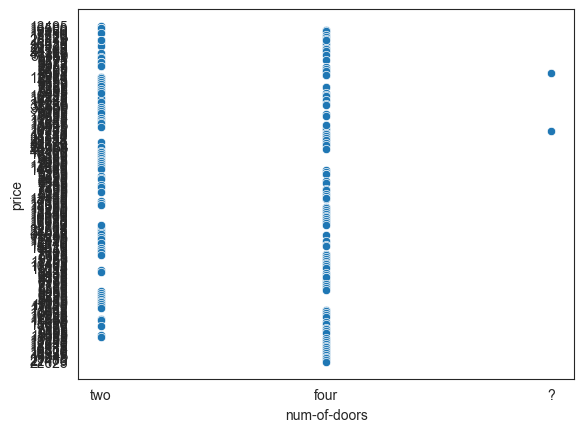

In [136]:
print(data['num-of-doors'].value_counts())
sns.scatterplot(data, x = data['num-of-doors'], y = data['price'])

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


<AxesSubplot:xlabel='body-style', ylabel='price'>

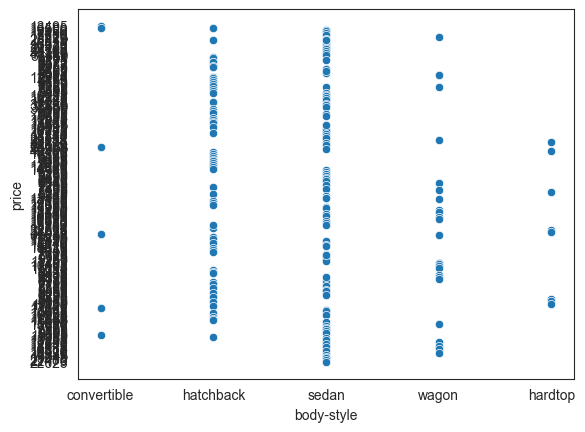

In [137]:
print(data['body-style'].value_counts())
print(data['body-style'].unique())
sns.scatterplot(data, x = data['body-style'], y = data['price'])

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64
['rwd' 'fwd' '4wd']


<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

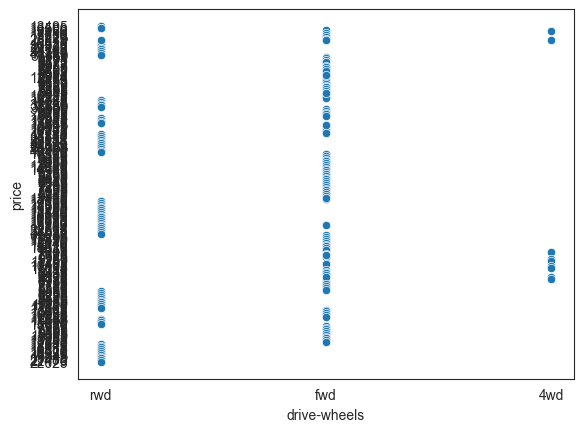

In [138]:
print(data['drive-wheels'].value_counts())
print(data['drive-wheels'].unique())
sns.scatterplot(data, x = data['drive-wheels'], y = data['price'])

front    202
rear       3
Name: engine-location, dtype: int64
['front' 'rear']


<AxesSubplot:xlabel='engine-location', ylabel='price'>

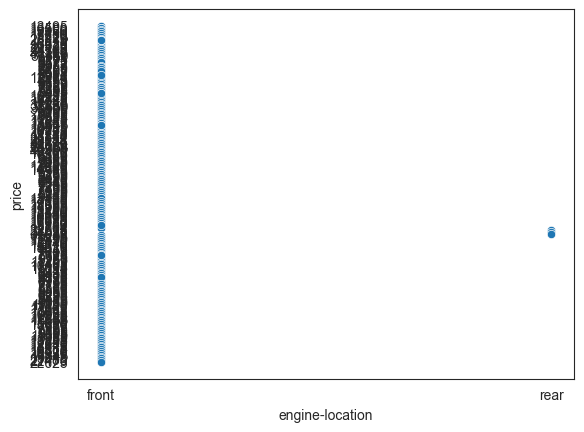

In [139]:
print(data['engine-location'].value_counts())
print(data['engine-location'].unique())
sns.scatterplot(data, x = data['engine-location'], y = data['price'])

In [140]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

94.5     21
93.7     20
95.7     13
96.5      8
97.3      7
98.4      7
104.3     6
100.4     6
107.9     6
98.8      6
99.1      6
96.3      6
109.1     5
93.1      5
97.2      5
95.9      5
102.4     5
97.0      4
95.3      4
114.2     4
101.2     4
110.0     3
103.5     3
89.5      3
105.8     3
96.1      2
102.9     2
104.5     2
91.3      2
96.9      2
88.6      2
113.0     2
99.8      2
115.6     2
103.3     2
86.6      2
104.9     2
93.3      1
99.4      1
99.5      1
88.4      1
94.3      1
96.0      1
95.1      1
93.0      1
102.0     1
106.7     1
108.0     1
96.6      1
99.2      1
112.0     1
102.7     1
120.9     1
Name: wheel-base, dtype: int64
[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 109.1]


<AxesSubplot:xlabel='wheel-base', ylabel='price'>

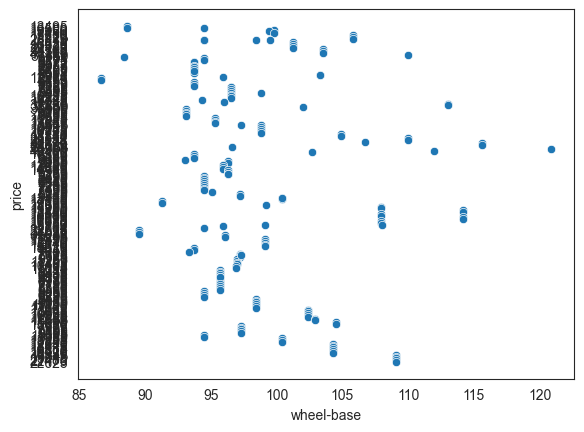

In [141]:
print(data['wheel-base'].value_counts())
print(data['wheel-base'].unique())
sns.scatterplot(data, x = data['wheel-base'], y = data['price'])

157.3    15
188.8    11
171.7     7
186.7     7
166.3     7
         ..
165.6     1
187.5     1
180.3     1
208.1     1
199.2     1
Name: length, Length: 75, dtype: int64
[168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197.  141.1 155.9
 158.8 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7
 172.6 199.6 191.7 159.1 166.8 169.  177.8 175.  190.9 187.5 202.6 180.3
 208.1 199.2 178.4 173.  172.4 165.3 170.2 165.6 162.4 173.4 181.7 184.6
 178.5 186.7 198.9 167.3 168.9 175.7 181.5 186.6 156.9 157.9 172.  173.5
 173.6 158.7 169.7 166.3 168.7 176.2 175.6 183.5 187.8 171.7 159.3 165.7
 180.2 183.1 188.8]


<AxesSubplot:xlabel='length', ylabel='price'>

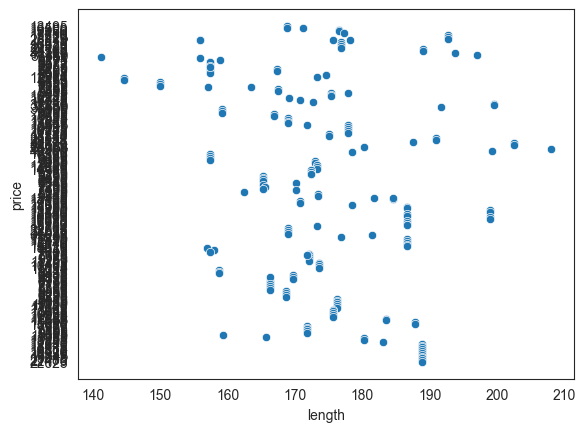

In [142]:
print(data['length'].value_counts())
print(data['length'].unique())
sns.scatterplot(data, x = data['length'], y = data['price'])

63.8    24
66.5    23
65.4    15
63.6    11
64.4    10
68.4    10
64.0     9
65.5     8
65.2     7
64.2     6
66.3     6
65.6     6
67.2     6
67.9     5
66.9     5
65.7     4
68.9     4
64.8     4
63.9     3
70.3     3
71.7     3
71.4     3
65.0     3
68.3     2
67.7     2
64.1     2
66.1     2
69.6     2
64.6     2
72.0     1
68.0     1
70.5     1
61.8     1
66.0     1
62.5     1
70.6     1
72.3     1
66.6     1
63.4     1
60.3     1
70.9     1
66.4     1
66.2     1
68.8     1
Name: width, dtype: int64
[64.1 65.5 66.2 66.4 66.3 71.4 67.9 64.8 66.9 70.9 60.3 63.6 63.8 64.6
 63.9 64.  65.2 62.5 66.  61.8 69.6 70.6 64.2 65.7 66.5 66.1 70.3 71.7
 70.5 72.  68.  64.4 65.4 68.4 68.3 65.  72.3 66.6 63.4 65.6 67.7 67.2
 68.9 68.8]


<AxesSubplot:xlabel='width', ylabel='price'>

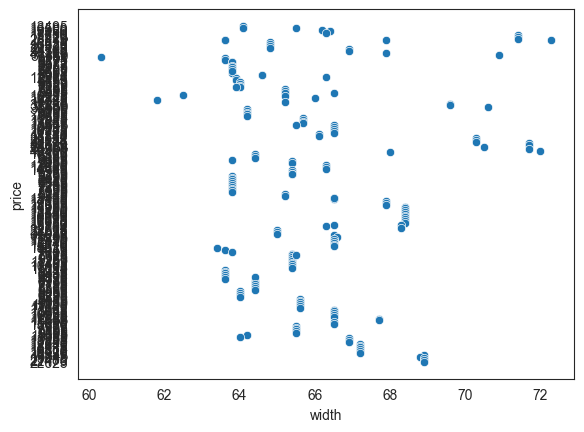

In [143]:
print(data['width'].value_counts())
print(data['width'].unique())
sns.scatterplot(data, x = data['width'], y = data['price'])

In [144]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

50.8    14
52.0    12
55.7    12
54.1    10
54.5    10
55.5     9
56.7     8
54.3     8
52.6     7
56.1     7
51.6     7
53.0     6
52.8     6
54.9     6
50.2     6
53.7     5
55.1     5
50.6     5
49.6     4
58.7     4
53.3     4
52.5     3
59.1     3
56.2     3
49.7     3
57.5     3
53.5     3
54.4     2
53.9     2
56.3     2
50.5     2
59.8     2
56.5     2
54.7     2
48.8     2
49.4     2
51.4     2
51.0     1
54.8     1
55.4     1
56.0     1
55.2     1
53.2     1
47.8     1
55.9     1
52.4     1
55.6     1
53.1     1
58.3     1
Name: height, dtype: int64
[48.8 52.4 54.3 53.1 55.7 55.9 52.  53.7 56.3 53.2 50.8 50.6 59.8 50.2
 52.6 54.5 58.3 53.3 54.1 51.  53.5 51.4 52.8 47.8 49.6 55.5 54.4 56.5
 58.7 54.9 56.7 55.4 54.8 49.4 51.6 54.7 55.1 56.1 49.7 56.  50.5 55.2
 52.5 53.  59.1 53.9 55.6 56.2 57.5]


<AxesSubplot:xlabel='height', ylabel='price'>

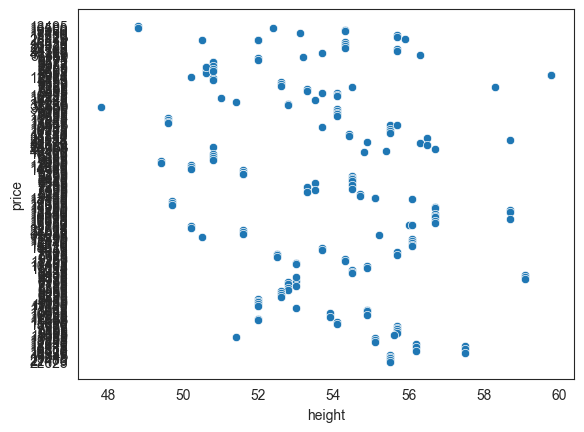

In [145]:
print(data['height'].value_counts())
print(data['height'].unique())
sns.scatterplot(data, x = data['height'], y = data['price'])

2385    4
1918    3
2275    3
1989    3
2410    2
       ..
2370    1
2328    1
2833    1
2921    1
3062    1
Name: curb-weight, Length: 171, dtype: int64
[2548 2823 2337 2824 2507 2844 2954 3086 3053 2395 2710 2765 3055 3230
 3380 3505 1488 1874 1909 1876 2128 1967 1989 2191 2535 2811 1713 1819
 1837 1940 1956 2010 2024 2236 2289 2304 2372 2465 2293 2734 4066 3950
 1890 1900 1905 1945 1950 2380 2385 2500 2410 2443 2425 2670 2700 3515
 3750 3495 3770 3740 3685 3900 3715 2910 1918 1944 2004 2145 2370 2328
 2833 2921 2926 2365 2405 2403 1889 2017 1938 1951 2028 1971 2037 2008
 2324 2302 3095 3296 3060 3071 3139 3020 3197 3430 3075 3252 3285 3485
 3130 2818 2778 2756 2800 3366 2579 2460 2658 2695 2707 2758 2808 2847
 2050 2120 2240 2190 2340 2510 2290 2455 2420 2650 1985 2040 2015 2280
 3110 2081 2109 2275 2094 2122 2140 2169 2204 2265 2300 2540 2536 2551
 2679 2714 2975 2326 2480 2414 2458 2976 3016 3131 3151 2261 2209 2264
 2212 2319 2254 2221 2661 2563 2912 3034 2935 3042 3045 3157 295

<AxesSubplot:xlabel='curb-weight', ylabel='price'>

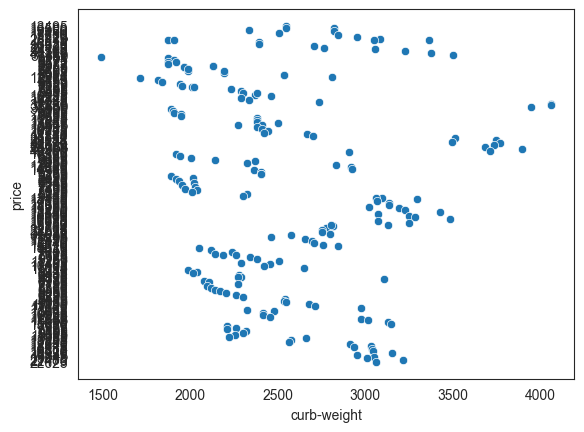

In [146]:
print(data['curb-weight'].value_counts())
print(data['curb-weight'].unique())
sns.scatterplot(data, x = data['curb-weight'], y = data['price'])

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


<AxesSubplot:xlabel='engine-type', ylabel='price'>

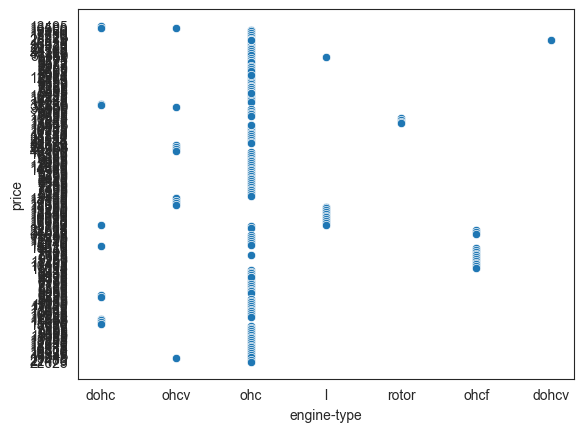

In [147]:
print(data['engine-type'].value_counts())
print(data['engine-type'].unique())
sns.scatterplot(data, x = data['engine-type'], y = data['price'])

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


<AxesSubplot:xlabel='num-of-cylinders', ylabel='price'>

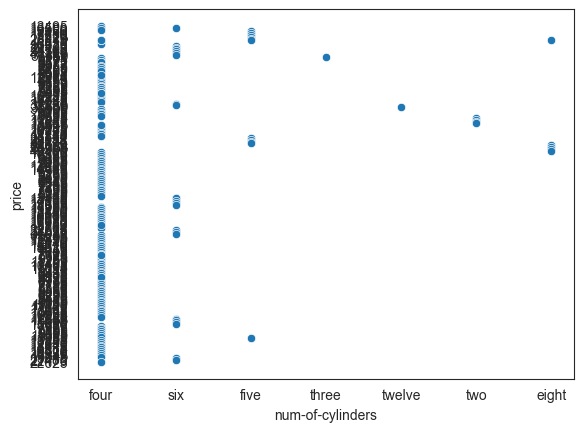

In [148]:
print(data['num-of-cylinders'].value_counts())
print(data['num-of-cylinders'].unique())
sns.scatterplot(data, x = data['num-of-cylinders'], y = data['price'])

122    15
92     15
97     14
98     14
108    13
90     12
110    12
109     8
120     7
141     7
152     6
181     6
146     6
121     6
156     5
136     5
91      5
183     4
130     4
171     3
70      3
194     3
209     3
164     3
258     2
140     2
134     2
234     2
132     2
131     2
173     1
203     1
161     1
80      1
151     1
103     1
304     1
308     1
326     1
119     1
111     1
79      1
61      1
145     1
Name: engine-size, dtype: int64
[130 152 109 136 131 108 164 209  61  90  98 122 156  92  79 110 111 119
 258 326  91  70  80 140 134 183 234 308 304  97 103 120 181 151 194 203
 132 121 146 171 161 141 173 145]


<AxesSubplot:xlabel='engine-size', ylabel='price'>

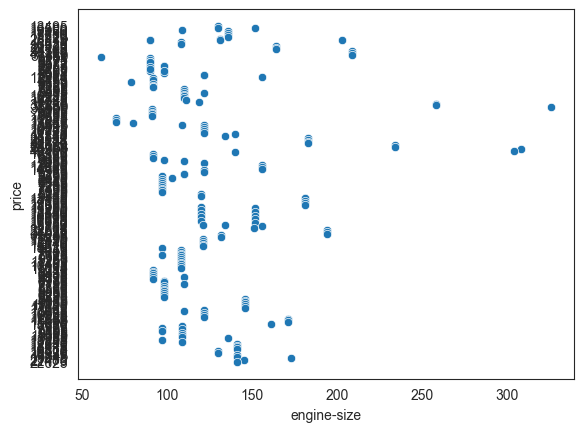

In [149]:
print(data['engine-size'].value_counts())
print(data['engine-size'].unique())
sns.scatterplot(data, x = data['engine-size'], y = data['price'])

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64


<AxesSubplot:xlabel='fuel-system', ylabel='price'>

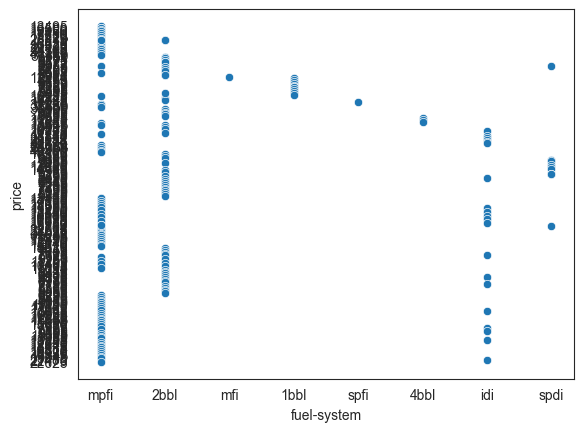

In [150]:
print(data['fuel-system'].value_counts())
sns.scatterplot(data, x = data['fuel-system'], y = data['price'])

3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.31     8
3.78     8
3.43     8
3.27     7
2.91     7
3.39     6
3.54     6
3.05     6
3.58     6
3.7      5
3.01     5
3.35     4
?        4
3.17     3
3.59     3
3.74     3
3.47     2
3.94     2
3.24     2
3.13     2
3.63     2
3.5      2
3.8      2
3.33     2
2.54     1
3.08     1
3.61     1
3.34     1
3.6      1
2.92     1
3.76     1
2.68     1
2.99     1
Name: bore, dtype: int64


<AxesSubplot:xlabel='bore', ylabel='price'>

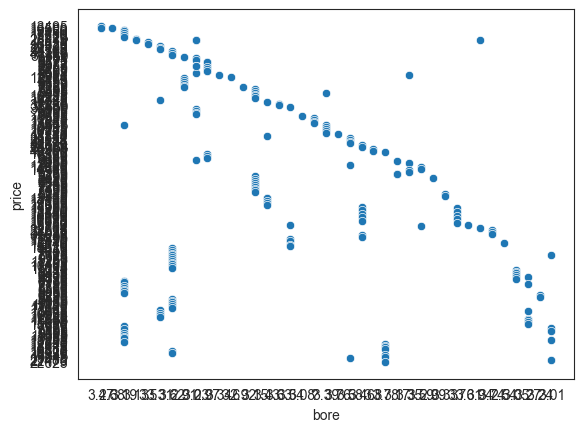

In [151]:
print(data['bore'].value_counts())
sns.scatterplot(data, x = data['bore'], y = data['price'])

In [152]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

3.4     20
3.23    14
3.15    14
3.03    14
3.39    13
2.64    11
3.29     9
3.35     9
3.46     8
3.11     6
3.27     6
3.41     6
3.07     6
3.58     6
3.19     6
3.5      6
3.64     5
3.52     5
3.86     4
3.54     4
3.47     4
?        4
3.9      3
2.9      3
3.1      2
4.17     2
2.8      2
2.19     2
3.08     2
2.68     2
2.36     1
3.16     1
2.07     1
3.21     1
3.12     1
2.76     1
2.87     1
Name: stroke, dtype: int64


<AxesSubplot:xlabel='stroke', ylabel='price'>

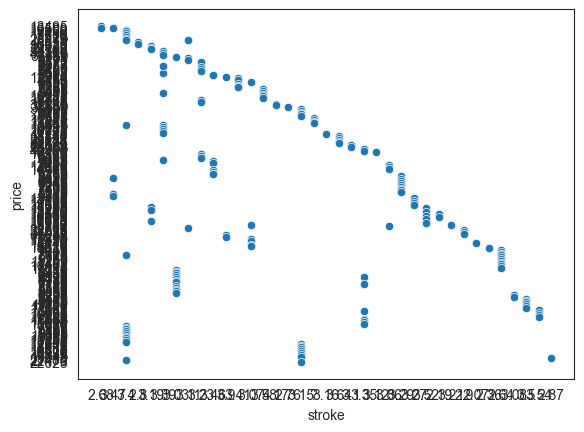

In [153]:
print(data['stroke'].value_counts())
sns.scatterplot(data, x = data['stroke'], y = data['price'])

9.00     46
9.40     26
8.50     14
9.50     13
9.30     11
8.70      9
8.00      8
9.20      8
7.00      7
8.60      5
21.00     5
8.40      5
7.50      5
23.00     5
9.60      5
21.50     4
7.60      4
10.00     3
22.50     3
8.30      3
8.80      3
7.70      2
8.10      2
9.10      1
9.31      1
7.80      1
9.41      1
21.90     1
22.00     1
22.70     1
10.10     1
11.50     1
Name: compression-ratio, dtype: int64


<AxesSubplot:xlabel='compression-ratio', ylabel='price'>

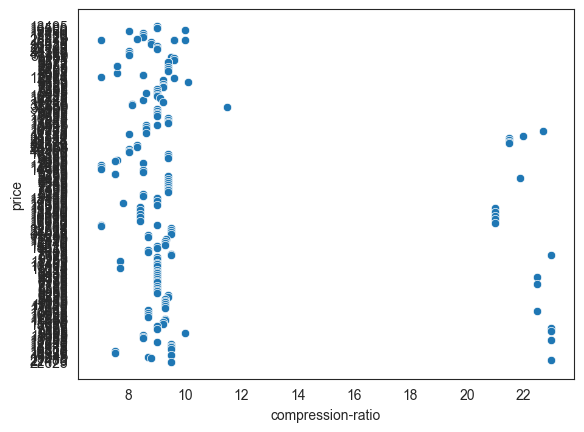

In [154]:
print(data['compression-ratio'].value_counts())
sns.scatterplot(data, x = data['compression-ratio'], y = data['price'])

68     19
70     11
69     10
116     9
110     8
95      7
88      6
62      6
101     6
160     6
114     6
84      5
97      5
102     5
145     5
82      5
76      5
111     4
92      4
123     4
86      4
90      3
73      3
85      3
207     3
182     3
121     3
152     3
112     2
56      2
161     2
156     2
94      2
52      2
?       2
162     2
155     2
184     2
100     2
176     2
55      1
262     1
134     1
115     1
140     1
48      1
58      1
60      1
78      1
135     1
200     1
64      1
120     1
72      1
154     1
288     1
143     1
142     1
175     1
106     1
Name: horsepower, dtype: int64


<AxesSubplot:xlabel='horsepower', ylabel='price'>

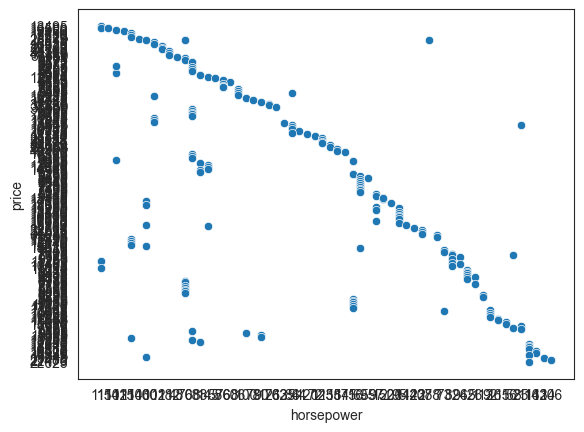

In [155]:
print(data['horsepower'].value_counts())
sns.scatterplot(data, x = data['horsepower'], y = data['price'])

5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
5250     7
4500     7
5800     7
4200     5
4150     5
4750     4
4350     4
5100     3
4250     3
5900     3
4400     3
?        2
6600     2
4650     1
5600     1
5750     1
4900     1
5300     1
Name: peak-rpm, dtype: int64


<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

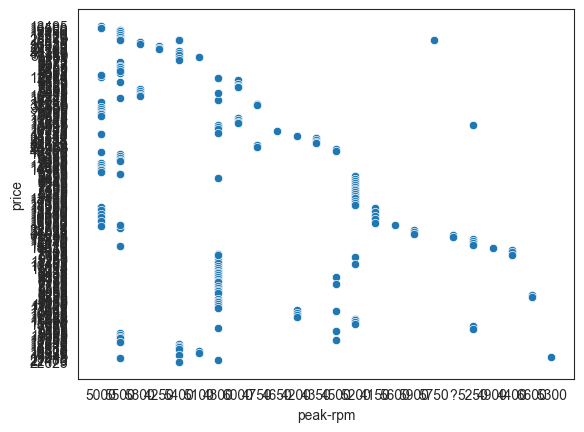

In [156]:
print(data['peak-rpm'].value_counts())
sns.scatterplot(data, x = data['peak-rpm'], y = data['price'])

31    28
19    27
24    22
27    14
17    13
26    12
23    12
21     8
25     8
30     8
38     7
28     7
16     6
37     6
22     4
29     3
15     3
20     3
18     3
14     2
34     1
35     1
32     1
36     1
45     1
13     1
49     1
47     1
33     1
Name: city-mpg, dtype: int64


<AxesSubplot:xlabel='city-mpg', ylabel='price'>

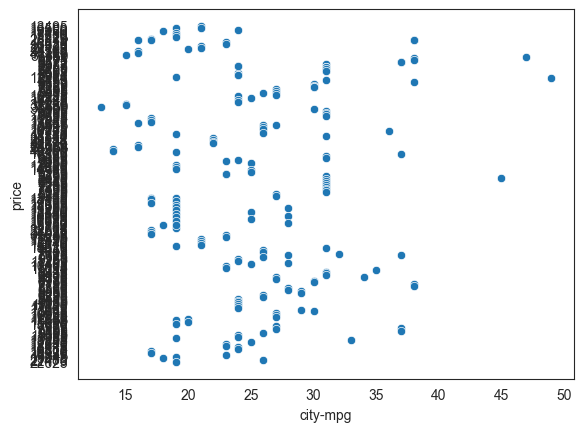

In [157]:
print(data['city-mpg'].value_counts())
sns.scatterplot(data, x = data['city-mpg'], y = data['price'])

25    19
38    17
24    17
30    16
32    16
34    14
37    13
28    13
29    10
33     9
22     8
31     8
23     7
27     5
43     4
42     3
26     3
41     3
19     2
39     2
18     2
16     2
20     2
36     2
47     2
46     2
54     1
17     1
53     1
50     1
Name: highway-mpg, dtype: int64


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

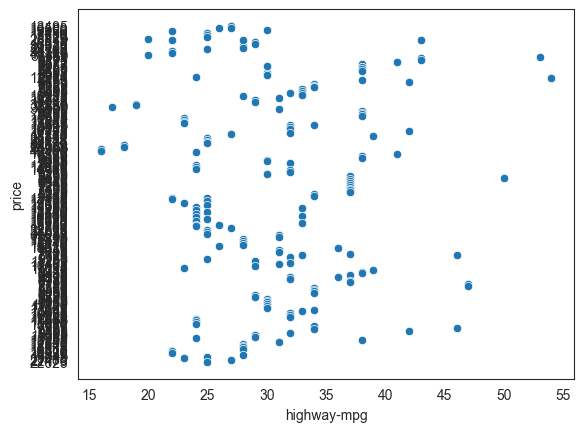

In [158]:
print(data['highway-mpg'].value_counts())
sns.scatterplot(data, x = data['highway-mpg'], y = data['price'])

# Handling Missing Values

In [159]:
import numpy as np

In [160]:
nod = np.where(data['num-of-doors'] == '?')
nod

(array([27, 63], dtype=int64),)

In [161]:
data.loc[63, 'num-of-doors'] = 'two'
data.loc[27, 'num-of-doors'] = 'two'

In [162]:
data.iloc[27, :]

symboling                1
normalized-losses      148
make                 dodge
fuel-type              gas
aspiration           turbo
num-of-doors           two
body-style           sedan
drive-wheels           fwd
engine-location      front
wheel-base            93.7
length               157.3
width                 63.8
height                50.6
curb-weight           2191
engine-type            ohc
num-of-cylinders      four
engine-size             98
fuel-system           mpfi
bore                  3.03
stroke                3.39
compression-ratio      7.6
horsepower             102
peak-rpm              5500
city-mpg                24
highway-mpg             30
price                 8558
Name: 27, dtype: object

In [163]:
nodw = np.where(data['drive-wheels'] == '4wd')
nodw

(array([  4,   9, 140, 144, 145, 148, 149, 154, 155], dtype=int64),)

In [164]:
for i in nodw:
    data.loc[i, 'drive-wheels'] = 'fwd'

In [165]:
nodw = np.where(data['drive-wheels'] == '4wd')
nodw

(array([], dtype=int64),)

In [166]:
nob = np.where(data['bore'] == '?')
nob

(array([55, 56, 57, 58], dtype=int64),)

In [167]:
for i in nob:
    data.loc[i, 'bore'] = np.nan

In [168]:
from sklearn.impute import SimpleImputer

In [169]:
si_bore = SimpleImputer(strategy = 'most_frequent')

In [170]:
data[['bore']] = si_bore.fit_transform(data[['bore']])

In [171]:
nos = np.where(data['stroke'] == '?')
for i in nob:
    data.loc[i, 'stroke'] = np.nan
si_bore = SimpleImputer(strategy = 'most_frequent')
data[['stroke']] = si_bore.fit_transform(data[['stroke']])

In [172]:
si_stroke = SimpleImputer(strategy = 'most_frequent')
data[['stroke']] = si_bore.fit_transform(data[['stroke']])

In [173]:
data.shape

(205, 26)

In [174]:
noh = np.where(data['horsepower'] == '?')
noh

(array([130, 131], dtype=int64),)

In [175]:
data.loc[130, 'horsepower'] = 100
data.loc[131, 'horsepower'] = 90

In [176]:
nop = np.where(data['peak-rpm'] == '?')
nop

(array([130, 131], dtype=int64),)

In [177]:
data['horsepower']

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: object

In [178]:
data.loc[130, 'peak-rpm'] = 5000
data.loc[131, 'peak-rpm'] = 5500

In [179]:
data['peak-rpm'] = data['peak-rpm'].astype(str).astype(int)

In [180]:
noh = np.where(data['make'] == 'renault')
noh

(array([130, 131], dtype=int64),)

In [181]:
data.shape

(205, 26)

In [182]:
no = np.where(data['price'] == '?')
no

(array([  9,  44,  45, 129], dtype=int64),)

In [183]:
data.loc[9, 'price'] = 25000
data.loc[44, 'price'] = 7000
data.loc[45, 'price'] = 7000
data.loc[129, 'price'] = 35000

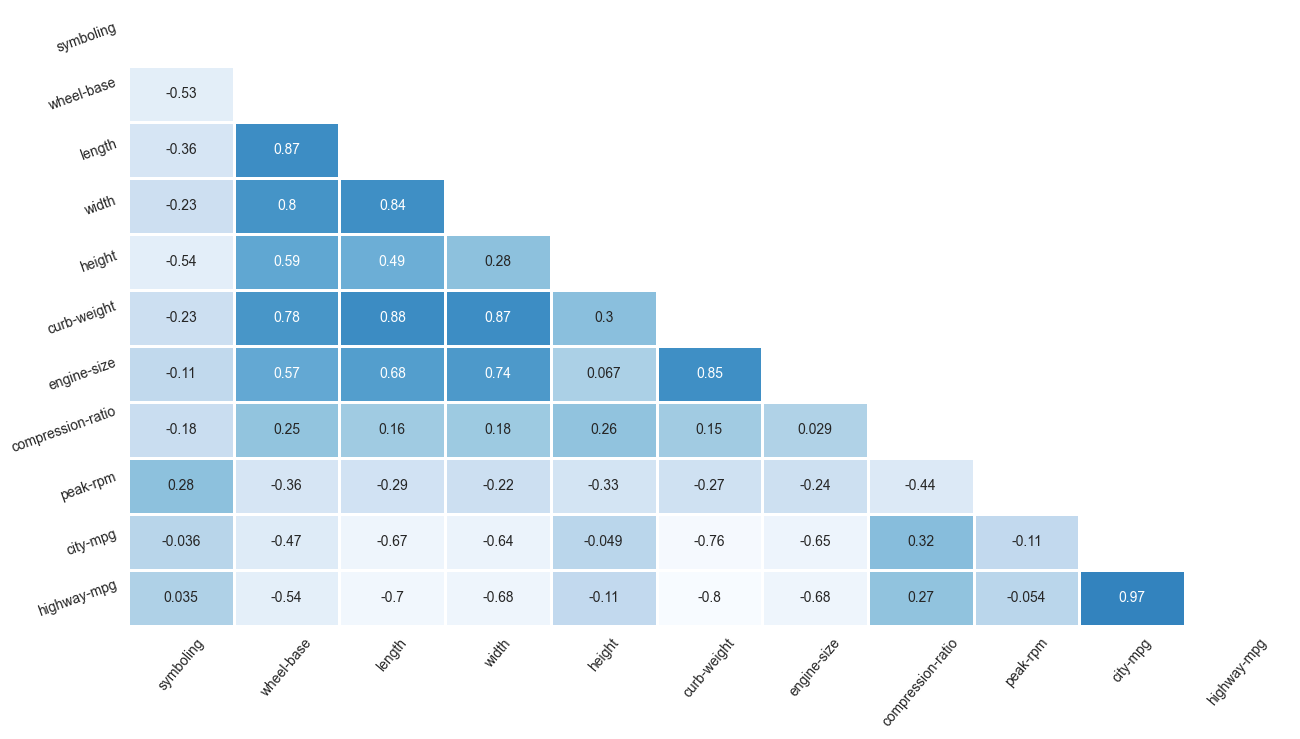

In [184]:
#Understanding the dataset and co-relation of features
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Heatmap
#Correlation Matrix
corr = data.corr() # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  

plt.figure(figsize = (15,8))  
sns.set_style(style = 'white')  
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   
plt.xticks(rotation = 50)   
plt.yticks(rotation = 20)   
plt.show()

# Pre-processing

In [185]:
#As the target(car prices) is not effected by this feature and most of the feature is missing, I am dropping the feature
data.drop('normalized-losses', axis=1, inplace=True)

In [186]:
data.shape

(205, 25)

In [187]:
import pandas as pd

In [188]:
data.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

# Handling Categorical features

Label Encoding

In [189]:
data['num-of-doors'] = data['num-of-doors'].map({'two': 2, 'four': 4})
data['num-of-cylinders'] = data['num-of-cylinders'].map({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})

In [190]:
data['num-of-doors']

0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: num-of-doors, Length: 205, dtype: int64

In [191]:
X = data.drop(columns = 'price', axis = 1)
y = data['price']

In [192]:
X.shape

(205, 24)

In [193]:
y.shape

(205,)

One Hot Encoding

In [194]:
make_ohe = pd.get_dummies(X[['make']], prefix='make', sparse=False)
X.drop('make', axis=1, inplace=True)
X = pd.concat([X, make_ohe], axis=1)
X.shape

(205, 45)

In [195]:
make_ohe = pd.get_dummies(X[['fuel-type']], prefix='fuel-type', sparse=False)
X.drop('fuel-type', axis=1, inplace=True)
X = pd.concat([X, make_ohe], axis=1)
X.shape

(205, 46)

In [196]:
make_ohe = pd.get_dummies(X[['aspiration']], prefix='aspiration', sparse=False)
X.drop('aspiration', axis=1, inplace=True)
X = pd.concat([X, make_ohe], axis=1)
X.shape

(205, 47)

In [197]:
ohe_cols = pd.get_dummies(X[['body-style']], prefix='body-style', sparse=False)
X.drop('body-style', axis=1, inplace=True)
X = pd.concat([X, ohe_cols], axis=1)
X.shape

(205, 51)

In [198]:
make_ohe = pd.get_dummies(X[['engine-location']], prefix='engine-location', sparse=False)
X.drop('engine-location', axis=1, inplace=True)
X = pd.concat([X, make_ohe], axis=1)
X.shape

(205, 52)

In [199]:
make_ohe = pd.get_dummies(X[['engine-type']], prefix='engine-type', sparse=False)
X.drop('engine-type', axis=1, inplace=True)
X = pd.concat([X, make_ohe], axis=1)
X.shape

(205, 58)

In [200]:
make_ohe = pd.get_dummies(X[['fuel-system']], prefix='fuel-system', sparse=False)
X.drop('fuel-system', axis=1, inplace=True)
X = pd.concat([X, make_ohe], axis=1)
X.shape

(205, 65)

In [201]:
make_ohe = pd.get_dummies(X[['drive-wheels']], prefix='drive-wheels', sparse=False)
X.drop('drive-wheels', axis=1, inplace=True)
X = pd.concat([X, make_ohe], axis=1)
X.shape

(205, 66)

# Splitting train and test data

In [202]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [203]:
X_train.shape

(164, 66)

In [204]:
y_train.shape

(164,)

In [205]:
X_train.head()

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,...,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,drive-wheels_fwd,drive-wheels_rwd
66,0,4,104.9,175.0,66.1,54.4,2700,4,134,3.43,...,0,0,0,1,0,0,0,0,0,1
111,0,4,107.9,186.7,68.4,56.7,3075,4,120,3.46,...,0,0,0,0,0,1,0,0,0,1
153,0,4,95.7,169.7,63.6,59.1,2280,4,92,3.05,...,0,1,0,0,0,0,0,0,1,0
96,1,4,94.5,165.3,63.8,54.5,1971,4,97,3.15,...,0,1,0,0,0,0,0,0,1,0
38,0,2,96.5,167.5,65.2,53.3,2289,4,110,3.15,...,1,0,0,0,0,0,0,0,1,0


In [206]:
y_train[y_train == '?']

Series([], Name: price, dtype: object)

In [207]:
y_test.shape

(41,)

# Model Building

In [208]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [209]:
lr.score(X_train, y_train)

0.9732755885516426

In [210]:
lr.score(X_test, y_test)

0.8996957685197777

In [211]:
from sklearn.tree import DecisionTreeRegressor

In [212]:
DTR = DecisionTreeRegressor()

In [213]:
DTR.fit(X_train, y_train)
print(DTR.score(X_train, y_train))
DTR.score(X_test, y_test)

0.998675911002822


0.9175675973604879

# Final Model

In [218]:
from sklearn.ensemble import RandomForestRegressor
final_model = RandomForestRegressor(max_depth=10)
final_model.fit(X_train, y_train)
print(final_model.score(X_train, y_train))
final_model.score(X_test, y_test)

0.9860012911522056


0.9504837861247986

In [219]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, final_model.predict(X_test)))
print(mean_absolute_error(y_test, final_model.predict(X_test)))

4070756.8539633714
1371.8683960149642
